# How many clusters of grain?

This exercise is taken and modified from https://github.com/benjaminwilson/python-clustering-exercises

This is a class to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).


**Step 1:** Load the dataset _(written for you)_.

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

seeds_df = pd.read_csv('../Data/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

In [42]:
#seeds_df['grain_variety'].unique()

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [43]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [47]:
samples = seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [48]:
ks = range (1,7)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

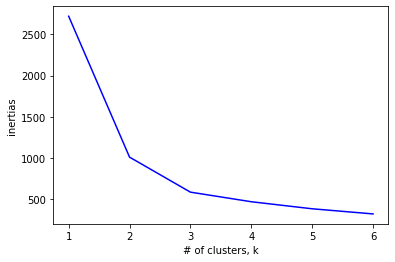

In [61]:
plt.plot(ks,inertias,'b')
plt.xlabel('# of clusters, k')
plt.ylabel('inertias')
plt.xticks(ks)
plt.show()

**Excellent work!** You can see from the graph the "best" number of clusters. Use this value for the next steps.

**Step 6:** Create a `KMeans` model called `model` with the best value from the above steps.

In [57]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

**Step 7:** Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.

Calling .fit_predict() is the same as calling .fit() and then calling .predict().

In [60]:
labels = model.fit_predict(samples)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

**Step 8:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [67]:
df = pd.DataFrame({'labels':labels,'varieties':varieties})

NameError: name 'varieties' is not defined

**Step 9:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [64]:
ct = pd.crosstab(df['labels'], df['varieties'])

NameError: name 'df' is not defined

**Step 10:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

In [65]:
print(ct)

NameError: name 'ct' is not defined

Now you are done. If you wish, you can also try to plot the clusters to visualize it.
